In [9]:

import pandas as pd
import matplotlib.pyplot as plt


In [18]:
# Mengambil dataset dari folder 'dataset'
df_1 = pd.read_csv('label/Aerostreet1_labeled.csv')
df_2 = pd.read_csv('label/Aerostreet2_labeled.csv')
df_3 = pd.read_csv('label/Aerostreet3_labeled.csv')
df_4 = pd.read_csv('label/Aerostreet4_labeled.csv')

In [19]:
def buat_pie_chart(df, title):
    # Menghitung distribusi label
    label_counts = df['Label'].value_counts()

    # Menambahkan jumlah data ke label
    labels = [f'{label} ({count})' for label, count in zip(label_counts.index, label_counts)]

    # Membuat pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Membuat pie chart menjadi bulat
    plt.show()


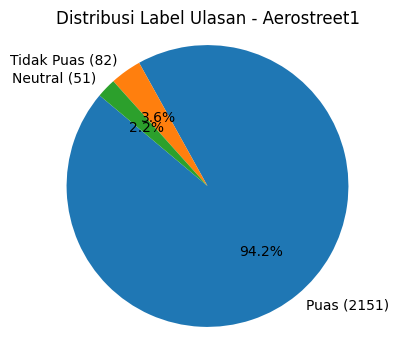

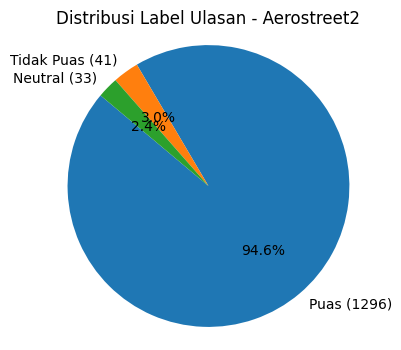

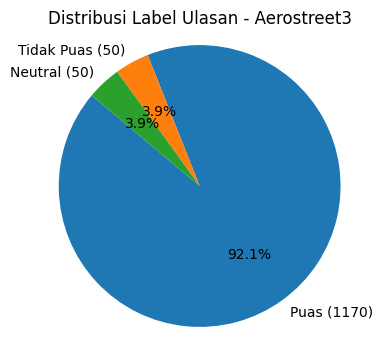

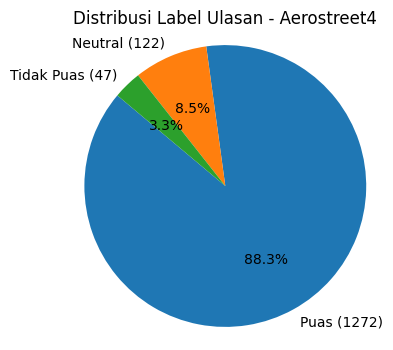

In [20]:

# Membuat pie chart untuk setiap dataset
buat_pie_chart(df_1, 'Distribusi Label Ulasan - Aerostreet1')
buat_pie_chart(df_2, 'Distribusi Label Ulasan - Aerostreet2')
buat_pie_chart(df_3, 'Distribusi Label Ulasan - Aerostreet3')
buat_pie_chart(df_4, 'Distribusi Label Ulasan - Aerostreet4')

In [21]:
# Menggabungkan data dari semua file
df = pd.concat([df_1, df_2, df_3, df_4])

# Menentukan kolom yang relevan
kolom = ['Ulasan', 'Label']
df = df[kolom]

# Menghitung distribusi label
label_counts = df['Label'].value_counts()

print(label_counts)

Label
Puas          5889
Neutral        256
Tidak Puas     220
Name: count, dtype: int64


In [25]:
# Mengambil maksimum 250 data dari masing-masing label
df_sampled = df.groupby('Label').apply(lambda x: x.sample(min(len(x), 250), random_state=1)).reset_index(drop=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27772\2192953231.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('Label').apply(lambda x: x.sample(min(len(x), 250), random_state=1)).reset_index(drop=True)


In [29]:
df_sampled['Label'].value_counts()

Label
Neutral       250
Puas          250
Tidak Puas    220
Name: count, dtype: int64

In [31]:
versi_dataset = 1
df_sampled.to_csv('../Dataset/dataset_'+ str(versi_dataset) +'.csv', index=False)